In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

## PCA 

In [49]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [50]:
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

In [8]:
X.shape

(150, 4)

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [59]:
X_reduced[0], X[0]

(array([-2.68412563,  0.31939725]), array([5.1, 3.5, 1.4, 0.2]))

In [57]:
X_reduced.shape

(150, 2)

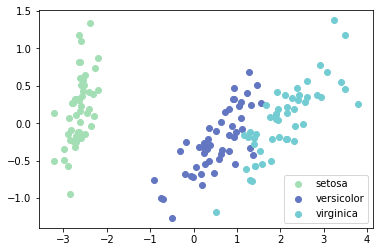

In [17]:
colors = ["#A4DEB4", "#6376C1", "#74CCD3"]

for color, target_idx, target_name in zip(colors, [0, 1, 2], iris_data.target_names):
    plt.scatter(X_reduced[y == target_idx, 0], X_reduced[y == target_idx, 1], color=color, label=target_name)
plt.legend()
plt.show()

## Neural Embeddings

### 1. BERT

In [60]:
import torch
from transformers import AutoTokenizer, AutoModel

In [20]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
tokenizer.cls_token, tokenizer.cls_token_id, tokenizer.mask_token, tokenizer.mask_token_id

('[CLS]', 101, '[MASK]', 103)

In [23]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

#### Enoding a doc

In [61]:
tokenizer.encode("study")

[101, 2817, 102]

In [25]:
tokenizer.decode([101, 2817, 102])

'[CLS] study [SEP]'

In [45]:
tokenizer.convert_ids_to_tokens(tokenizer.encode("study"))

['[CLS]', 'study', '[SEP]']

In [63]:
tokenizer.convert_ids_to_tokens(tokenizer.encode("neural networks are black boxes."))

['[CLS]', 'neural', 'networks', 'are', 'black', 'boxes', '.', '[SEP]']

In [62]:
tokenizer.encode("neural networks are black boxes. There should be a sep token somewhere here.")

[101,
 15756,
 6125,
 2024,
 2304,
 8378,
 1012,
 2045,
 2323,
 2022,
 1037,
 19802,
 19204,
 4873,
 2182,
 1012,
 102]

In [27]:
tokenizer.decode([102, 2000, 2042])

'[SEP] to been'

In [28]:
dir(tokenizer)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_additional_special_tokens',
 '_batch_encode_plus',
 '_bos_token',
 '_cls_token',
 '_convert_encoding',
 '_convert_id_to_token',
 '_convert_token_to_id_with_added_voc',
 '_create_or_get_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_from_pretrained',
 '_get_padding_truncation_strategies',
 '_get_repo_url_from_name',
 '_mask_token',
 '_pad',
 '_pad_token',
 '_pad_token_type_id',
 '_push_to_hub',
 '_save_pretrained',
 '_sep_token',
 '_tokenizer',
 '_un

In [29]:
def embed_text_using_bert(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    return last_hidden_states

In [64]:
to_embed = "We would like to embed this text!"

print("Vocab ids:")
print(tokenizer.encode(to_embed))

Vocab ids:
[101, 2057, 2052, 2066, 2000, 7861, 8270, 2023, 3793, 999, 102]


In [65]:
print("Token ids:")
print(tokenizer.convert_ids_to_tokens([101, 2057, 2052, 2066, 2000, 7861, 8270, 2023, 3793, 999, 102]))

Token ids:
['[CLS]', 'we', 'would', 'like', 'to', 'em', '##bed', 'this', 'text', '!', '[SEP]']


In [32]:
vec = embed_text_using_bert(to_embed)
print(vec.shape)

torch.Size([1, 11, 768])


In [33]:
mean_vec = vec.mean(1).detach().numpy()
print(mean_vec.shape)

(1, 768)


#### Visualizing contextual vectors in 2d embedding space

In [34]:
s1 = "I went to the bank yesterday to withdraw cash."
s2 = "We went fishing by the river bank."
s3 = "He has borrowed a loan from the bank."
s4 = "The bank issued a new 10 rupee note yesterday."

In [35]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(s1)), tokenizer.convert_tokens_to_ids(tokenizer.tokenize(s2)), tokenizer.convert_tokens_to_ids(tokenizer.tokenize(s3)), tokenizer.convert_tokens_to_ids(tokenizer.tokenize(s4))

([1045, 2253, 2000, 1996, 2924, 7483, 2000, 10632, 5356, 1012],
 [2057, 2253, 5645, 2011, 1996, 2314, 2924, 1012],
 [2002, 2038, 11780, 1037, 5414, 2013, 1996, 2924, 1012],
 [1996, 2924, 3843, 1037, 2047, 2184, 21766, 28084, 3602, 7483, 1012])

In [36]:
tokenizer.convert_ids_to_tokens([2924])

['bank']

In [37]:
s1vec = embed_text_using_bert(s1)[0:4:]
s1vec.shape

torch.Size([1, 12, 768])

In [76]:
embed_text_using_bert("adventure")

tensor([[[-0.2714, -0.0988, -0.0246,  ..., -0.1452,  0.1943,  0.1932],
         [-0.2611, -0.9128, -0.1425,  ...,  0.1244,  0.4893, -1.1103],
         [ 0.8449, -0.0620, -0.2899,  ...,  0.0398, -0.8511, -0.2079]]],
       grad_fn=<NativeLayerNormBackward0>)

In [77]:
embed_text_using_bert("movie adventure lord of the rings")

tensor([[[-0.2593, -0.0280, -0.1265,  ..., -0.3691,  0.5829,  0.1290],
         [ 0.6792,  0.1643, -0.4040,  ...,  0.0445,  0.6822, -0.0459],
         [ 0.1466,  0.3843,  0.0497,  ..., -0.3319,  0.3326, -0.8355],
         ...,
         [ 0.1583, -0.1830, -0.6424,  ..., -0.2118, -0.0340, -0.2663],
         [-0.3968, -0.0187, -0.6092,  ...,  0.4115, -0.1936, -0.6930],
         [ 0.8821, -0.0595, -0.3000,  ...,  0.1215, -0.7610, -0.1975]]],
       grad_fn=<NativeLayerNormBackward0>)

In [66]:
def get_bank_contextual_vector(text):
    bank_idx = tokenizer.encode(text).index(2924)
    v1 = embed_text_using_bert(text).detach().numpy()[0, bank_idx]
    print(v1.shape)
    return v1

In [67]:
s1vec = get_bank_contextual_vector(s1)
s2vec = get_bank_contextual_vector(s2)
s3vec = get_bank_contextual_vector(s3)
s4vec = get_bank_contextual_vector(s4)

(768,)
(768,)
(768,)
(768,)


In [69]:
(s1vec == s3vec).all()

False

In [70]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(np.array([s1vec, s2vec, s3vec, s4vec]))

In [71]:
X_2d.shape

(4, 2)

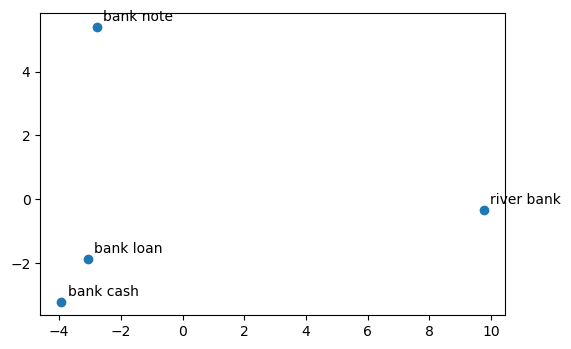

In [73]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(X_2d[:,0], X_2d[:, 1])

for _, txt in enumerate(['bank cash', 'river bank', 'bank loan', 'bank note']):
    ax.annotate(txt, (X_2d[_, 0]+0.2, X_2d[_, 1]+0.2))

In [ ]:
s1 = "I went to the bank yesterday to withdraw cash."
s2 = "We went fishing by the river bank."
s3 = "He has borrowed a loan from the bank."
s4 = "The bank issued a new 10 rupee note yesterday."

### 2. Word2Vec

https://colab.research.google.com/drive/1CFhMBtGVxeTRD0w_lTo36N69Vgi6eh-G?usp=sharing

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
s1 = "I went to the bank yesterday to withdraw cash."
s2 = "We went fishing by the river bank."

In [ ]:
doc1 = nlp(s1)
doc2 = nlp(s2)

In [ ]:
for token in doc1:
    print(token.text, token.pos_)
    if token.text == 'bank':
        v1 = token.vector

for token in doc2:
    print(token.text, token.pos_)
    if token.text == 'bank':
        v2 = token.vector

In [ ]:
(v1 == v2).all()